# Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

# Importing Libraries

In [77]:
#data processing
import pandas as pd
import numpy as np

#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

# algorithms
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [3]:
df=pd.read_csv('hranalysis.csv')

In [4]:
#checking the first 5 rows
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
#checking size of the dataset
df.shape

(1470, 35)

In [6]:
#attribute check
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We have 1470 rows with 34 employment centric attributes and our target variable 'Attrition'. 

There is 0 null values in the dataset.

Of the 35 columns, we have:

NUMERIC : 
    
'Age', 'DailyRate','DistanceFromHome', 'Education', 'EmployeeCount','EmployeeNumber','EnvironmentSatisfaction',   'HourlyRate','JobInvolvement', 'JobLevel',  'JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
    
CATEGORICAL:  
    
'Attrition' (Boolean), 'BusinessTravel', 'Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus','Over18',  'OverTime'



In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df['EmployeeNumber']

0          1
1          2
2          4
3          5
4          7
        ... 
1465    2061
1466    2062
1467    2064
1468    2065
1469    2068
Name: EmployeeNumber, Length: 1470, dtype: int64

Since this is a unique Employee Number/ID column, this will not likely determine/influence the Attrition of the employee. Let us drop this column before we proceed with EDA.

In [10]:
df=df.drop('EmployeeNumber',axis=1)

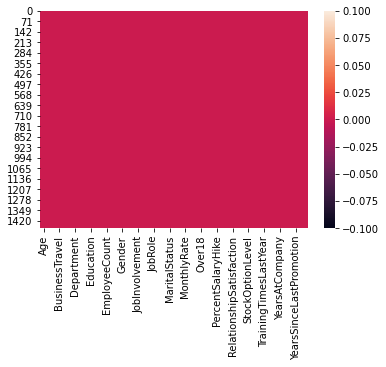

In [12]:
#checking null values
sns.heatmap(df.isnull())

We now have a dataset that contains 1470 non-null rows for 34 features.

# EDA (Exploratory Data Analysis)

In [16]:
profile=ProfileReport(df,title='Profiling Report')
profile

With the help of this report, we can now see that our dataset contains Booleans, Categorical and Numeric features.

We have no duplicate rows. However, 'EmployeeCount', 'Over18' and 'StandardHours' have single, constant values. Hence, it won't be helpful to include those for predicting attrition.

MonthlyIncome, JobLevel, JobRole, Department have a high correlation.

Catergorical features will need to be encoded and numeric data will need to be scaled.

We also notice skewness in certain columns, which we will handle later.

In [17]:
#dropping constant value columns
df=df.drop(['EmployeeCount', 'Over18', 'StandardHours'],axis=1)

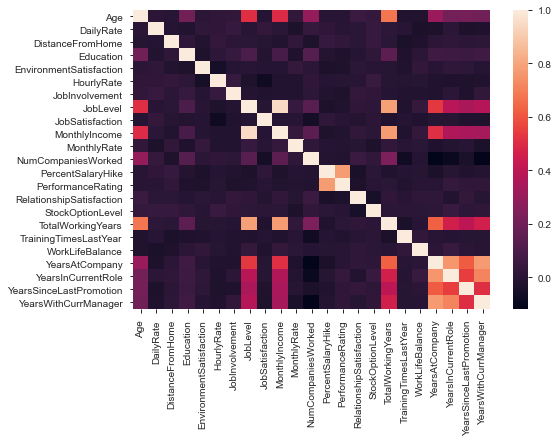

In [18]:
#examine the relationship of each numeric feature using multivariate analysis
sns.heatmap(df.corr())

In [20]:
#encode all categorical/boolean features so that we can derive relationships from the data during EDA
LE=LabelEncoder()
df["Attrition"]=LE.fit_transform(df["Attrition"])
df["BusinessTravel"]=LE.fit_transform(df["BusinessTravel"])
df["Department"]=LE.fit_transform(df["Department"])
df["Gender"]=LE.fit_transform(df["Gender"])
df["EducationField"]=LE.fit_transform(df["EducationField"])
df["JobRole"]=LE.fit_transform(df["JobRole"])
df["MaritalStatus"]=LE.fit_transform(df["MaritalStatus"])
df["OverTime"]=LE.fit_transform(df["OverTime"])

Text(0.5, 1.0, 'Attrition')

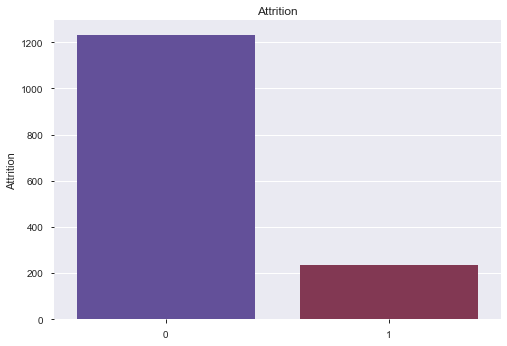

In [30]:
sns.barplot(df["Attrition"].value_counts().index,df["Attrition"].value_counts(), palette='twilight').set_title("Attrition")

We see that employee turnover to be low.

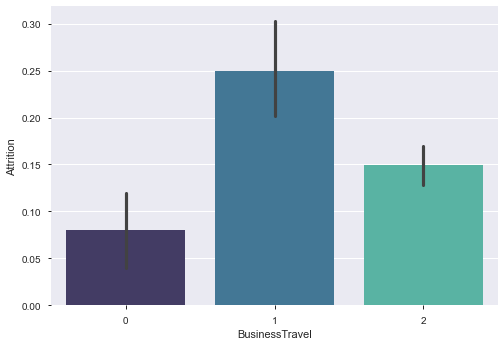

In [35]:
sns.barplot(x="BusinessTravel",y="Attrition", data=df, palette= 'mako') 

We see that attrition was higher among employees who traveled frequently.

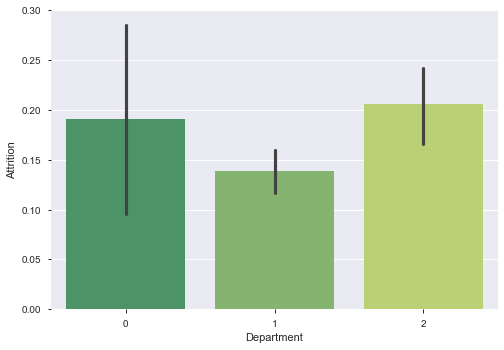

In [38]:
sns.barplot(x="Department",y="Attrition", data=df, palette= 'summer') 

Sales Department has higher attrition rates followed by Human Resources.

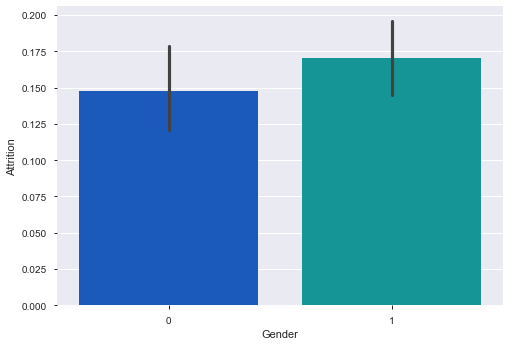

In [39]:
sns.barplot(x="Gender",y="Attrition", data=df, palette= 'winter') 

Attrition was more prominent among male employees.

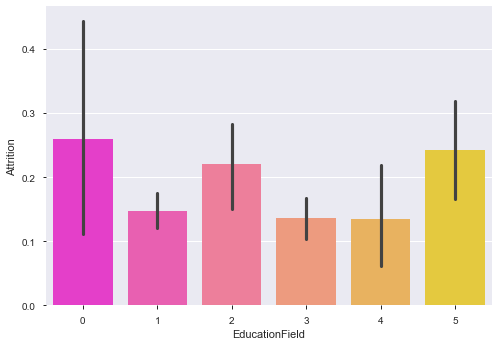

In [43]:
sns.barplot(x="EducationField",y="Attrition", data=df, palette= 'spring') 

Attrition was highest in Human Resources followed by Technical and Marketing fields.

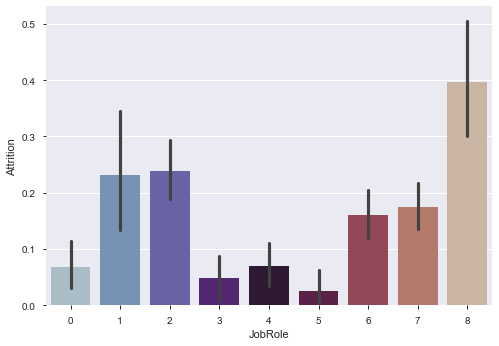

In [47]:
sns.barplot(x="JobRole",y="Attrition", data=df, palette= 'twilight') 

Attrition was highest in Sales Representatives, Laboratory Technicians followed by Human Resource Job Roles.

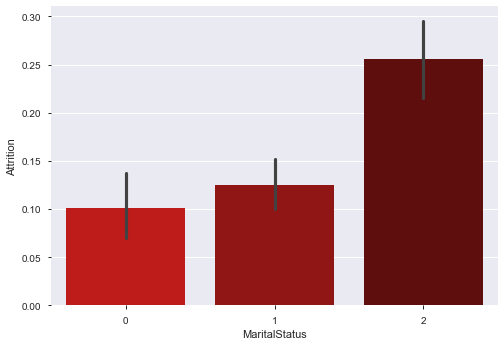

In [54]:
sns.barplot(x="MaritalStatus",y="Attrition", data=df, palette= 'flag') 

This indicates that Singles tended to change jobs more frequently than Married employees. Divorced employees exhibit a lower tendency to switch jobs.

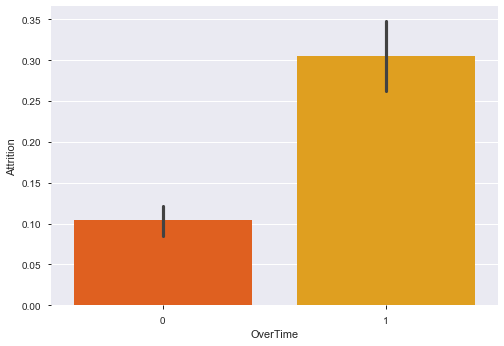

In [53]:
sns.barplot(x="OverTime",y="Attrition", data=df, palette= 'autumn') 

Employees who worked overtime changed jobs more often.

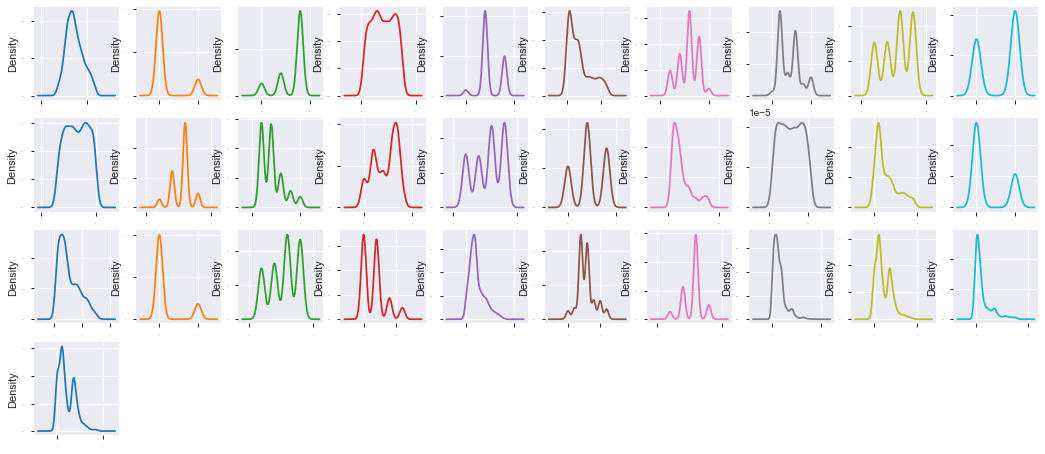

In [64]:
df.plot(kind='density', subplots=True, layout=(6,10), legend=False, sharex=False, fontsize=1, figsize=(18,12)) 
plt.show()

In [21]:
#checking correlation with each feature
df.corr()["Attrition"].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

Higher the Overtime and/or Distance from home --> Higher are the chances of employee turnover == More the attrition

Higher the Total years, Job levels, Time in current role, w/Manager, Age, Satisfaction levels --> Higher the chances of employees staying in the same company == Lower the attrition

# Data Processing

In [62]:
x = df.drop('Attrition', axis = 1)
y = df['Attrition']

In [63]:
#Checking skewness
x.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
Y

As observed in the density plot earlier, there is skewness in the data beyond the threshold values of +-0.50. 

In [65]:
#using power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

In [66]:
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew() #checking for skewness now

Age                        -0.007603
BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.000000
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           1.921883
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
YearsAtCompany             -0.008683
Y

In [67]:
x=df_new

With skewness out of the way, let us now check for any possible outliers.

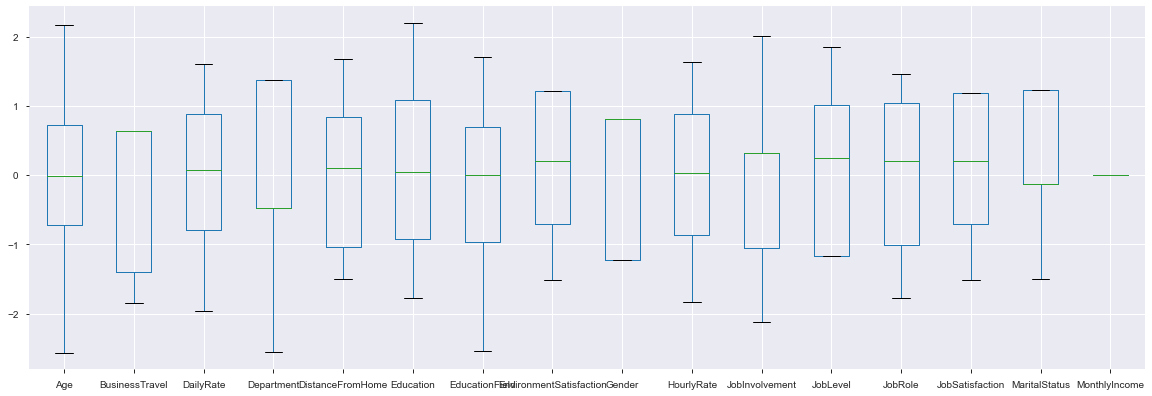

In [70]:
#Checking Outliers
x.iloc[:,0:16].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

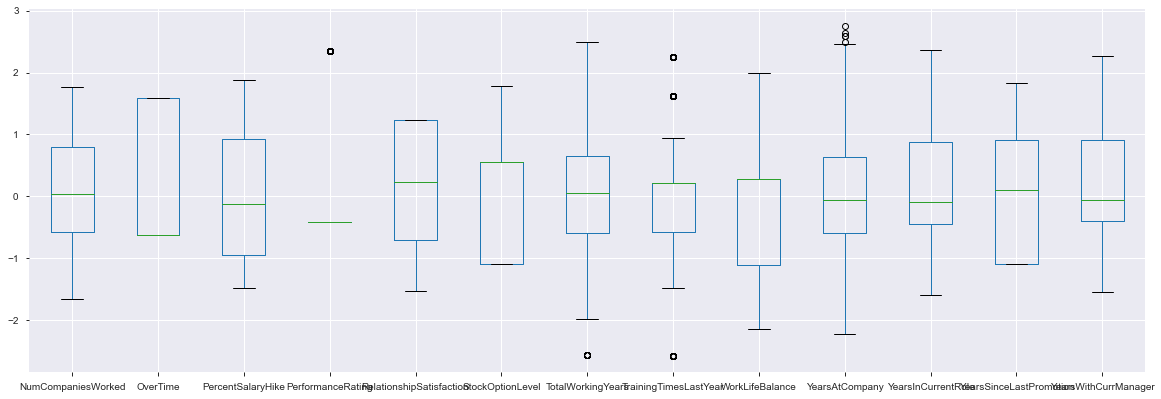

In [71]:
#Checking Outliers
x.iloc[:,17:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

We notice few outliers for Training times and Years at Company but they are few and closer to the whiskers, so we can proceed to use the data as is.

In [72]:
#Scaling
std = StandardScaler()
x = std.fit_transform(x)

# Best Random State

In [73]:
maxAccuracy=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.30, random_state=i)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    predlr = LR.predict(x_test)
    acc= accuracy_score(y_test, predlr)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRS=i
print("Best accuracy is",maxAccuracy, "on Random_State ", maxRS)

Best accuracy is 0.9160997732426304 on Random_State  123


With the best random state at 123, we will create the train test split.

In [74]:
x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.30, random_state=123)

In [88]:
LR= LogisticRegression()
LR.fit(x_train,y_train)
predlr= LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9160997732426304
[[377   7]
 [ 30  27]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       384
           1       0.79      0.47      0.59        57

    accuracy                           0.92       441
   macro avg       0.86      0.73      0.77       441
weighted avg       0.91      0.92      0.91       441



In [89]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
predrf=RF.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8934240362811792
[[381   3]
 [ 44  13]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       384
           1       0.81      0.23      0.36        57

    accuracy                           0.89       441
   macro avg       0.85      0.61      0.65       441
weighted avg       0.89      0.89      0.87       441



In [90]:
svc=SVC()
svc.fit(x_train,y_train)
predsv=svc.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.8979591836734694
[[381   3]
 [ 42  15]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       384
           1       0.83      0.26      0.40        57

    accuracy                           0.90       441
   macro avg       0.87      0.63      0.67       441
weighted avg       0.89      0.90      0.87       441



In [91]:
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt= dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7664399092970522
[[314  70]
 [ 33  24]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       384
           1       0.26      0.42      0.32        57

    accuracy                           0.77       441
   macro avg       0.58      0.62      0.59       441
weighted avg       0.82      0.77      0.79       441



In [92]:
knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(x_train, y_train)  
predknn = knn.predict(x_test)  
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8866213151927438
[[378   6]
 [ 44  13]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       384
           1       0.68      0.23      0.34        57

    accuracy                           0.89       441
   macro avg       0.79      0.61      0.64       441
weighted avg       0.87      0.89      0.86       441



In [93]:
GNB = GaussianNB() 
GNB.fit(x_train, y_train)  
predgn = GNB.predict(x_test)  
print(accuracy_score(y_test,predgn))
print(confusion_matrix(y_test,predgn))
print(classification_report(y_test,predgn))

0.8390022675736961
[[338  46]
 [ 25  32]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       384
           1       0.41      0.56      0.47        57

    accuracy                           0.84       441
   macro avg       0.67      0.72      0.69       441
weighted avg       0.86      0.84      0.85       441



In [104]:
XGB = XGBClassifier() 
XGB.fit(x_train, y_train)  
predxg = XGB.predict(x_test)  
print(accuracy_score(y_test,predxg))
print(confusion_matrix(y_test,predxg))
print(classification_report(y_test,predxg))

[16:12:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8866213151927438
[[372  12]
 [ 38  19]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       384
           1       0.61      0.33      0.43        57

    accuracy                           0.89       441
   macro avg       0.76      0.65      0.68       441
weighted avg       0.87      0.89      0.87       441



We are getting highest accuracy with Logistic Regression (91%). Let us verify cross validation scores next.

In [95]:
LRcv=cross_val_score(LR,x,y,cv=5)
print("Cross Validation Score of Logistic Regression Model:", LRcv.mean())

Cross Validation Score of Logistic Regression Model: 0.8687074829931973


In [96]:
RFcv=cross_val_score(RF,x,y,cv=5)
print("Cross Validation Score of Random Forest Classifier Model:", RFcv.mean())

Cross Validation Score of Random Forest Classifier Model: 0.8564625850340135


In [97]:
SVcv=cross_val_score(svc,x,y,cv=5)
print("Cross Validation Score of Support Vector Classifier Model:", SVcv.mean())

Cross Validation Score of Support Vector Classifier Model: 0.8646258503401361


In [98]:
DTcv=cross_val_score(dt,x,y,cv=5)
print("Cross Validation Score of Decision Tree Classifier Model:", DTcv.mean())

Cross Validation Score of Decision Tree Classifier Model: 0.7884353741496598


In [101]:
GNcv=cross_val_score(GNB,x,y,cv=5)
print("Cross Validation Score of K Nearest Neighbours Classifier Model:", GNcv.mean())

Cross Validation Score of K Nearest Neighbours Classifier Model: 0.8258503401360544


In [102]:
KNcv=cross_val_score(knn,x,y,cv=5)
print("Cross Validation Score of K Nearest Neighbours Classifier Model:", KNcv.mean())

Cross Validation Score of K Nearest Neighbours Classifier Model: 0.8476190476190476


In [103]:
XGcv=cross_val_score(XGB,x,y,cv=5)
print("Cross Validation Score of K Nearest Neighbours Classifier Model:", XGcv.mean())

[16:01:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:01:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:01:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:01:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GaussianNB is the best model here, given the least difference between its Accuracy score and Cross Validation Score.

# Hyper Parameter Tuning

In [113]:
GaussianNB().get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [114]:
parameters= {'var_smoothing':np.logspace(0,-9, num=100)}

In [115]:
GCV=GridSearchCV(GaussianNB(), parameters, cv=5,verbose=1, 
                 scoring='accuracy')

In [116]:
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [117]:
GCV.best_params_ 

{'var_smoothing': 0.8111308307896871}

In [118]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [119]:
accuracy_score(y_test,GCV_pred)

0.8934240362811792

In [ ]:
import joblib
joblib.dump(GCV.best_estimator_,"Attrition.pkl")